**(SAND) GRU model -‘Open’, ‘EMA_7’**





In [53]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout,Activation
from keras import optimizers
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [54]:
#sand = 'https://raw.githubusercontent.com/loguansiang/fyp/main/SAND%20fyp.csv'
#slp= 'https://raw.githubusercontent.com/loguansiang/fyp/main/SLP%20fyp.csv'
mana = 'https://raw.githubusercontent.com/loguansiang/fyp/main/MANA%20fyp.csv'

df = pd.read_csv(mana)

In [55]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [56]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.014329,0.016111,0.013886,0.015130,0.015130,653800
2017-11-10,0.015162,0.015734,0.012645,0.012940,0.012940,296429
2017-11-11,0.013201,0.013616,0.011758,0.011979,0.011979,237865
2017-11-12,0.011975,0.011975,0.010125,0.010505,0.010505,242761
2017-11-13,0.010628,0.011660,0.010628,0.011330,0.011330,225836
...,...,...,...,...,...,...
2022-04-13,2.153283,2.212506,2.113025,2.201286,2.201286,216991854
2022-04-14,2.200854,2.235230,2.100408,2.117604,2.117604,269798320
2022-04-15,2.117844,2.152222,2.107485,2.143937,2.143937,201367474


In [57]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import pandas as pd
import ta
from ta import add_all_ta_features
from ta.utils import dropna

In [59]:
df['Pre_Close'] = df['Close'].shift(+1)
df[('H-L')] = df['High'] - df['Low']
df[('0-C')]= df['Open'] - df['Close']
df['SMA_7'] = df.Close.rolling(7, min_periods=1).mean()
df['rsi_7']=ta.momentum.rsi(df.Close,window=7)
#df['MACD'] = ta.trend.macd_diff(df.Close)
df['EMA_7']= df['Close'].ewm(span=7).mean()
df = df.drop(columns=['Adj Close'])
df.dropna(inplace= True)
df

,Open,High,Low,Close,Volume,Pre_Close,H-L,0-C,SMA_7,rsi_7,EMA_7
Date,,,,,,,,,,,
2017-11-15,0.011461,0.012014,0.011398,0.012002,283268,0.011419,0.000616,-0.000541,0.012186,33.965216,0.011807
2017-11-16,0.012013,0.012595,0.011742,0.011793,357512,0.012002,0.000853,0.000220,0.011710,31.878810,0.011803
2017-11-17,0.011729,0.012085,0.011187,0.012028,268762,0.011793,0.000898,-0.000299,0.011579,36.958740,0.011864
2017-11-18,0.012021,0.013352,0.011435,0.013019,370149,0.012028,0.001917,-0.000998,0.011728,53.879565,0.012170
2017-11-19,0.012934,0.013975,0.012661,0.013099,379424,0.013019,0.001314,-0.000165,0.012099,55.016698,0.012413
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13,2.153283,2.212506,2.113025,2.201286,216991854,2.153636,0.099481,-0.048003,2.243642,37.935015,2.251587
2022-04-14,2.200854,2.235230,2.100408,2.117604,269798320,2.201286,0.134822,0.083250,2.200956,33.194641,2.218091
2022-04-15,2.117844,2.152222,2.107485,2.143937,201367474,2.117604,0.044737,-0.026093,2.183354,36.124984,2.199553


In [60]:
def data_prep(dataset, target, data_start, data_end, look_back, horizon):
    dataX,dataY = [],[]
    data_start = data_start + look_back
    if data_end is None:
        data_end = len(dataset) - horizon

    for i in range(data_start, data_end):
        a = range(i-look_back, i)
        dataX.append(dataset[a])

        b = range(i+1, i+1+horizon)
        dataY.append(target[b])
    return np.array(dataX), np.array(dataY)

In [61]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
# X_data = X_scaler.fit_transform(df[['Open', 'High', 'Low','Volume','H-L',	'0-C','SMA_7','rsi_7','EMA_7']])//experiment4
X_data = X_scaler.fit_transform(df[['Pre_Close']])
Y_data = Y_scaler.fit_transform(df[['Close']])

##['Open', 'High', 'Low','Volume']
##['H-L',	'0-C','SMA_7','rsi_7','EMA_7']

In [62]:
##TRAIN_SPLIT = int(len(df) * 0.8)
look_back = 10
horizon = 10
train_split = int(len(df) * 0.8)
x_train, y_train = data_prep(X_data, Y_data, 0, train_split, look_back, horizon)
x_vali, y_vali = data_prep(X_data, Y_data, train_split, None, look_back, horizon)

In [63]:
# x_train

In [64]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0])

Multiple window of past history

[[0.00000000e+00]
 [1.06624977e-04]
 [6.84009289e-05]
 [1.11380122e-04]
 [2.92624295e-04]
 [3.07255510e-04]
 [2.97745220e-04]
 [3.26093199e-04]
 [3.94859908e-04]
 [4.42777136e-04]]

 Target horizon

[[0.00069503]
 [0.00097085]
 [0.00113747]
 [0.00059169]
 [0.00063614]
 [0.00078173]
 [0.00096536]
 [0.00097633]
 [0.00119051]
 [0.00211655]]


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evalution
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import tensorflow as tf

In [66]:
batch_size = 32
buffer_size = 18

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.batch(batch_size).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [67]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# from keras.layers.merge import concatenate
import tensorflow as tf

In [68]:
x_train.shape[-2:]

(10, 1)

In [69]:

# define model
# import tensorflow as tf
# from tensorflow.keras import layers
# Set random seed for as reproducible results as possible
# tf.random.set_seed(7)
# cnn_model = Sequential()
# cnn_model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(x_train.shape[-2:])))
# cnn_model.add(Conv1D(filters=64, kernel_size=1))
# cnn_model.add(MaxPooling1D(pool_size=(1)))
# cnn_model.add(Conv1D(filters=128, kernel_size=1))
# cnn_model.add(Flatten())
# cnn_model.add(Dense(256,))
# cnn_model.add(Dropout(0.2))
# cnn_model.add(Dense(10))
# cnn_model.compile(optimizer='adam', loss='mse')
# cnn_model.summary()


In [70]:

import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(7)

lstm_model = Sequential()
lstm_model.add(LSTM(100,return_sequences=True,input_shape=(x_train.shape[-2:])))
lstm_model.add(Dense(20,activation='linear'))
lstm_model.add(LSTM(50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=horizon,activation='linear'))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 100)           40800     
                                                                 
 dense_4 (Dense)             (None, 10, 20)            2020      
                                                                 
 lstm_5 (LSTM)               (None, 50)                14200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 57,530
Trainable params: 57,530
Non-trainable params: 0
_________________________________________________________________


In [71]:
#model_path = 'CNN_Multivariate.h5'
#early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
#checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
#callbacks=[early_stopings,checkpoint]

In [72]:
history = lstm_model.fit(train_data,epochs=50,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1)#callback
##history = cnn_model.fit(train_data,epochs=50,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1)

Epoch 1/50
100/100 [==============================] - 9s 40ms/step - loss: 0.0021 - val_loss: 0.1169
Epoch 2/50
100/100 [==============================] - 3s 34ms/step - loss: 0.0015 - val_loss: 0.1871
Epoch 3/50
100/100 [==============================] - 4s 35ms/step - loss: 0.0021 - val_loss: 0.0850
Epoch 4/50
100/100 [==============================] - 3s 33ms/step - loss: 9.9543e-04 - val_loss: 0.0854
Epoch 5/50
100/100 [==============================] - 3s 34ms/step - loss: 0.0017 - val_loss: 0.0595
Epoch 6/50
100/100 [==============================] - 3s 35ms/step - loss: 7.0080e-04 - val_loss: 0.0129
Epoch 7/50
100/100 [==============================] - 4s 36ms/step - loss: 5.5610e-04 - val_loss: 0.0178
Epoch 8/50
100/100 [==============================] - 4s 38ms/step - loss: 5.1702e-04 - val_loss: 0.0421
Epoch 9/50
100/100 [==============================] - 3s 28ms/step - loss: 6.2986e-04 - val_loss: 0.0239
Epoch 10/50
100/100 [==============================] - 2s 17ms/step - l

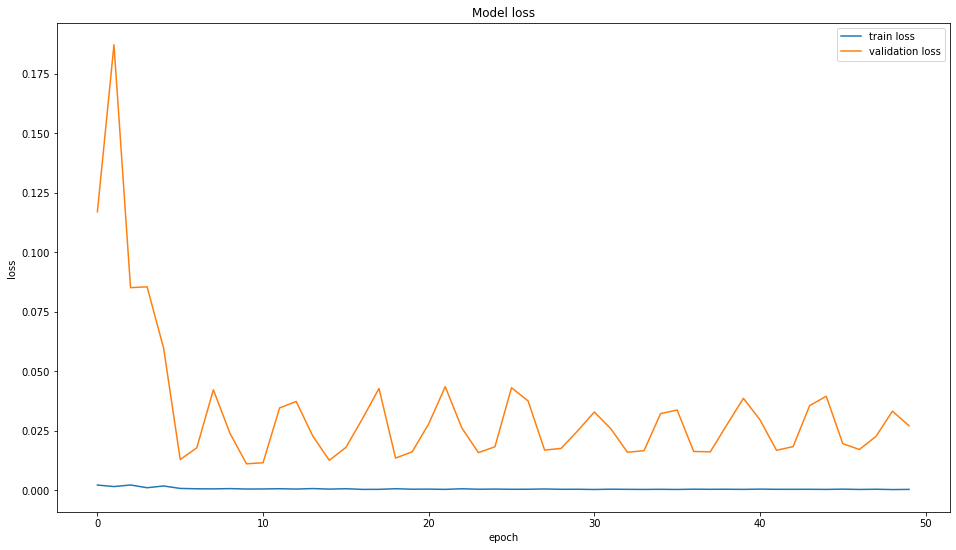

In [73]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [74]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Pre_Close', 'H-L', '0-C',
       'SMA_7', 'rsi_7', 'EMA_7'],
      dtype='object')

In [75]:

##['open']


data_val = X_scaler.fit_transform(df[['Pre_Close']].tail(10))
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])
pred=lstm_model.predict(val_rescaled)
pred_Inverse = Y_scaler.inverse_transform(pred)
pred_Inverse

1/1 [==============================] - 1s 794ms/step


array([[1.2439616, 1.2663136, 1.2514052, 1.2499616, 1.2820063, 1.2967368,
        1.2453203, 1.2780819, 1.189685 , 1.1410674]], dtype=float32)

In [76]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')


In [77]:
validate = (df[['Close']].tail(10))
timeseries_evaluation_metrics_func(validate['Close'],pred_Inverse[0])

Evaluation metric results:-
MSE is : 0.8890645451566199
MAE is : 0.9392607333824159
RMSE is : 0.9429021927838644
MAPE is : 42.95164619275097


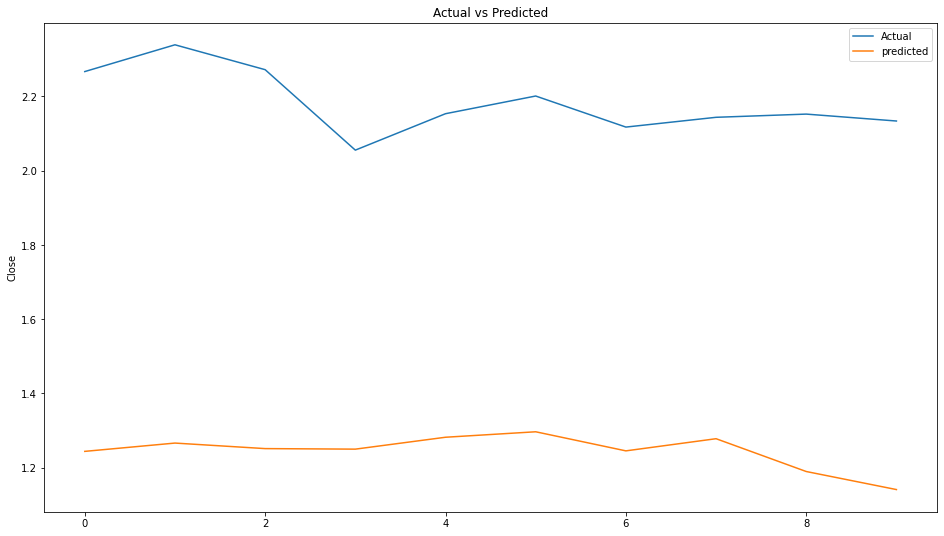

In [78]:
plt.figure(figsize=(16,9))
plt.plot( list(validate['Close']))
plt.plot( list(pred_Inverse[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Close")
plt.legend(('Actual','predicted'))
plt.show()